Thank You KGP Talkie for the lesson

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
mnist = keras.datasets.fashion_mnist

In [4]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [0]:
class_name = ['top', 'trouser','pullover','dress','coat','sandal', 'shirt','sneaker','bag','ankleboot']

Data Exploration

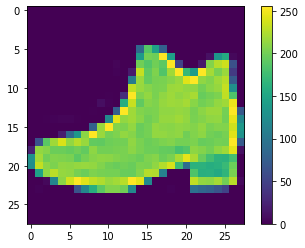

In [11]:
plt.figure()
plt.imshow(X_train[15])
plt.colorbar()

In [0]:
#Data Normalization
X_train = X_train/255.0

In [0]:
X_test = X_test/255.0

Build Tensorflow Model

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [35]:
model = Sequential()
model.add(Flatten(input_shape= (28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


###Model Compilation
- Loss Function
- Optimizer
- Metrics

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(X_train,y_train, epochs=20, batch_size=10, validation_split=0.2)

ERROR! Session/line number was not unique in database. History logging moved to new session 61
Epoch 1/20
4800/4800 [==============================] - 10s 2ms/step - loss: 0.4973 - accuracy: 0.8240 - val_loss: 0.4142 - val_accuracy: 0.8484
Epoch 2/20
4800/4800 [==============================] - 10s 2ms/step - loss: 0.3740 - accuracy: 0.8636 - val_loss: 0.4030 - val_accuracy: 0.8495
Epoch 3/20
4800/4800 [==============================] - 10s 2ms/step - loss: 0.3363 - accuracy: 0.8764 - val_loss: 0.3717 - val_accuracy: 0.8678
Epoch 4/20
4800/4800 [==============================] - 10s 2ms/step - loss: 0.3167 - accuracy: 0.8843 - val_loss: 0.3477 - val_accuracy: 0.8752
Epoch 5/20
4800/4800 [==============================] - 10s 2ms/step - loss: 0.2966 - accuracy: 0.8905 - val_loss: 0.3330 - val_accuracy: 0.8827
Epoch 6/20
4800/4800 [==============================] - 9s 2ms/step - loss: 0.2834 - accuracy: 0.8943 - val_loss: 0.3425 - val_accuracy: 0.8763
Epoch 7/20
4800/4800 [==============

In [38]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4101 - accuracy: 0.8807
0.8806999921798706


In [23]:
pip install mlxtend

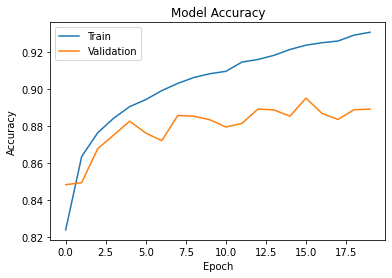

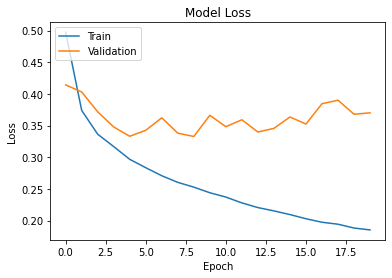

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

###Plot Confusion Matrix

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2a40d7f0f0>)

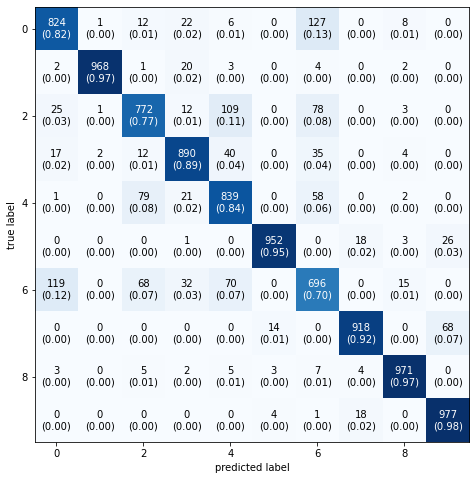

In [51]:
y_pred = model.predict_classes(X_test)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(8,8), show_normed=True)